In [1]:
import numpy as np
import pandas as pd

In [2]:
# https://www.statsmodels.org/stable/index.html
import statsmodels.api as sm

In [3]:
# Download Dataset from https://www.dropbox.com/scl/fi/32vgpt3jvtztu86avdnwg/Mortgage.xlsx?rlkey=qx1d46hzgn4h67zrcyajdyl3e&dl=1
# and add it to colab

In [4]:
# mortgageDf = pd.read_excel("./Mortgage.xlsx")
mortgageDf = pd.read_excel("https://www.dropbox.com/scl/fi/32vgpt3jvtztu86avdnwg/Mortgage.xlsx?rlkey=qx1d46hzgn4h67zrcyajdyl3e&dl=1")

In [5]:
mortgageDf

,y,x1,x2
0,1,16.35,49.94
1,1,34.43,56.16
2,1,39.19,36.89
3,1,23.58,56.88
4,0,29.92,27.05
5,1,25.26,44.38
6,1,36.51,48.98
7,1,11.70,55.55
8,0,32.21,31.28
9,1,28.74,35.63


In [6]:
mortgageDf.size

90

In [7]:
mortgageDf.describe()

,y,x1,x2
count,30.000000,30.000000,30.000000
mean,0.566667,24.305667,37.819333
std,0.504007,9.842847,10.942216
min,0.000000,10.120000,20.790000
25%,0.000000,14.857500,29.372500
50%,1.000000,25.570000,36.260000
75%,1.000000,32.182500,47.777500
max,1.000000,39.190000,56.880000


In [8]:
mortgageDf.shape

(30, 3)

In [9]:
import matplotlib.pyplot as plt

In [10]:
# Plotting
fig1 = plt.figure(
  figsize=(8, 8)
)

<Figure size 800x800 with 0 Axes>

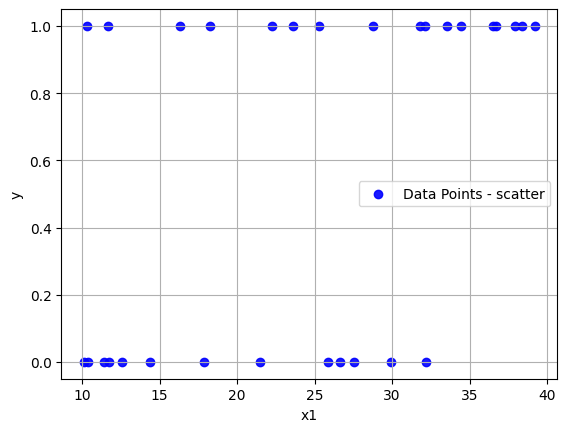

In [11]:
plt.scatter(
  mortgageDf["x1"],
  mortgageDf["y"],
  color='blue',
  alpha=0.9,
  label='Data Points - scatter',
)

plt.xlabel('x1')
plt.ylabel('y')
plt.legend()
plt.grid(True)



plt.show()

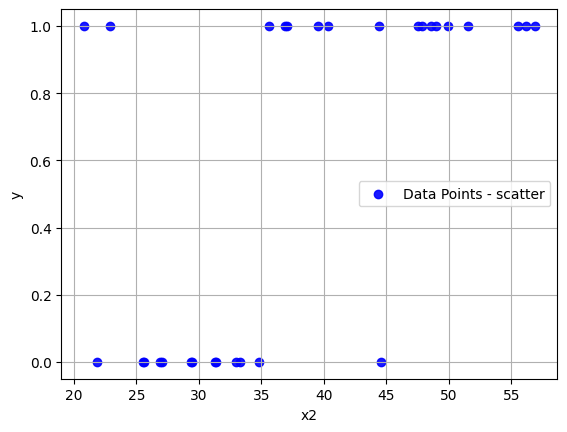

In [12]:
plt.scatter(
  mortgageDf["x2"],
  mortgageDf["y"],
  color='blue',
  alpha=0.9,
  label='Data Points - scatter',
)

plt.xlabel('x2')
plt.ylabel('y')
plt.legend()
plt.grid(True)



plt.show()

In [13]:
model1 = sm.OLS(
  mortgageDf["y"],
  sm.add_constant(mortgageDf[["x1", "x2"]])
)
model1Fit = model1.fit()
print(model1Fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     13.82
Date:                Mon, 17 Jun 2024   Prob (F-statistic):           7.37e-05
Time:                        22:44:33   Log-Likelihood:                -10.931
No. Observations:                  30   AIC:                             27.86
Df Residuals:                      27   BIC:                             32.07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8682      0.281     -3.089      0.0

In [14]:
predict1 = model1Fit.predict(sm.add_constant(mortgageDf[["x1", "x2"]]))
mortgageDf['predict1'] = predict1
mortgageDf

,y,x1,x2,predict1
0,1,16.35,49.94,0.729871
1,1,34.43,56.16,1.231162
2,1,39.19,36.89,0.823078
3,1,23.58,56.88,1.045349
4,0,29.92,27.05,0.394258
5,1,25.26,44.38,0.754114
6,1,36.51,48.98,1.084883
7,1,11.70,55.55,0.787177
8,0,32.21,31.28,0.546666
9,1,28.74,35.63,0.593656


In [15]:
model1Fit.predict([[1, 20, 30]])

array([0.28356899])

In [16]:
model1Fit.predict([[1, 20, 15]])

array([-0.10389379])

In [17]:
model1Fit.predict([[1, 40, 50]])

array([1.17698081])

In [19]:
logisticRegYFromX1AndX2Model = sm.Logit(
  mortgageDf["y"],
  sm.add_constant(mortgageDf[["x1", "x2"]])
)
logisticRegYFromX1AndX2ModelFit = logisticRegYFromX1AndX2Model.fit()
print(logisticRegYFromX1AndX2ModelFit.summary())

Optimization terminated successfully.
         Current function value: 0.363910
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   30
Model:                          Logit   Df Residuals:                       27
Method:                           MLE   Df Model:                            2
Date:                Mon, 17 Jun 2024   Pseudo R-squ.:                  0.4681
Time:                        22:44:43   Log-Likelihood:                -10.917
converged:                       True   LL-Null:                       -20.527
Covariance Type:            nonrobust   LLR p-value:                 6.708e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.3671      3.196     -2.931      0.003     -15.631      -3.103
x1             0.1349      0.

In [20]:
predict2 = logisticRegYFromX1AndX2ModelFit.predict(sm.add_constant(mortgageDf[["x1", "x2"]]))
mortgageDf['predict2'] = predict2
mortgageDf

,y,x1,x2,predict1,predict2
0,1,16.35,49.94,0.729871,0.850564
1,1,34.43,56.16,1.231162,0.994966
2,1,39.19,36.89,0.823078,0.923739
3,1,23.58,56.88,1.045349,0.981132
4,0,29.92,27.05,0.394258,0.375201
5,1,25.26,44.38,0.754114,0.875451
6,1,36.51,48.98,1.084883,0.986447
7,1,11.70,55.55,0.787177,0.892025
8,0,32.21,31.28,0.546666,0.634794
9,1,28.74,35.63,0.593656,0.702665


In [23]:
logisticRegYFromX1AndX2ModelFit.predict([[1, 20, 30]]), logisticRegYFromX1AndX2ModelFit.predict([[1, 20, 15]]), logisticRegYFromX1AndX2ModelFit.predict([[1, 40, 50]])

(array([0.21042055]), array([0.01806123]), array([0.99289663]))

In [24]:
model3 = sm.OLS(
  mortgageDf["y"],
  sm.add_constant(mortgageDf[["x1"]])
)
model3Fit = model3.fit()
print(model3Fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     6.875
Date:                Mon, 17 Jun 2024   Prob (F-statistic):             0.0140
Time:                        22:44:46   Log-Likelihood:                -18.211
No. Observations:                  30   AIC:                             40.42
Df Residuals:                      28   BIC:                             43.23
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0141      0.227      0.062      0.9

In [25]:
model4 = sm.Logit(
  mortgageDf["y"],
  sm.add_constant(mortgageDf[["x1"]])
)
model4Fit = model4.fit()
print(model4Fit.summary())

Optimization terminated successfully.
         Current function value: 0.579907
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   30
Model:                          Logit   Df Residuals:                       28
Method:                           MLE   Df Model:                            1
Date:                Mon, 17 Jun 2024   Pseudo R-squ.:                  0.1525
Time:                        22:44:46   Log-Likelihood:                -17.397
converged:                       True   LL-Null:                       -20.527
Covariance Type:            nonrobust   LLR p-value:                   0.01235
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2077      1.140     -1.936      0.053      -4.442       0.027
x1             0.1043      0.

In [26]:
min = 0
min

0

In [27]:
max = mortgageDf["x1"].max() + 10
max, len(mortgageDf["x1"])

(49.19, 30)

In [28]:
x = np.linspace(min - 5, max + 5, 500)
# x

In [29]:
import math

In [30]:
lREq = 0.0141 + x *  0.0227
logREq = pow(math.e, (-2.2077  + 0.1043 * x))/ (1+ pow(math.e, (-2.2077  + 0.1043 * x)))

In [31]:
len(lREq)

500

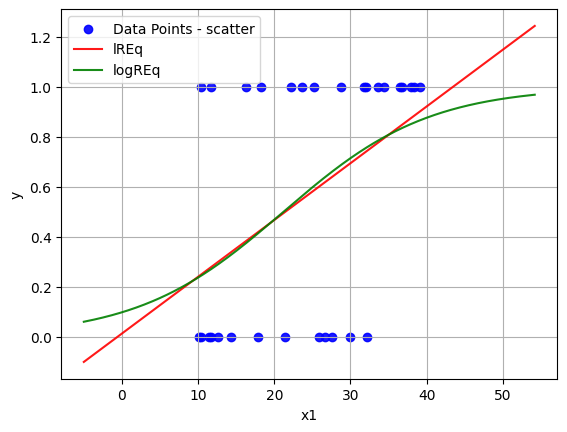

In [32]:

plt.scatter(
  mortgageDf["x1"],
  mortgageDf["y"],
  color='blue',
  alpha=0.9,
  label='Data Points - scatter',
)

plt.plot(
  x,
  lREq,
  color='red',
  alpha=0.9,
  label='lREq',
)

plt.plot(
  x,
  logREq,
  color='green',
  alpha=0.9,
  label='logREq',
)

plt.xlabel('x1')
plt.ylabel('y')
plt.legend()
plt.grid(True)



plt.show()